## Importar


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#importar geopy: pip install geopy

## Funcoes

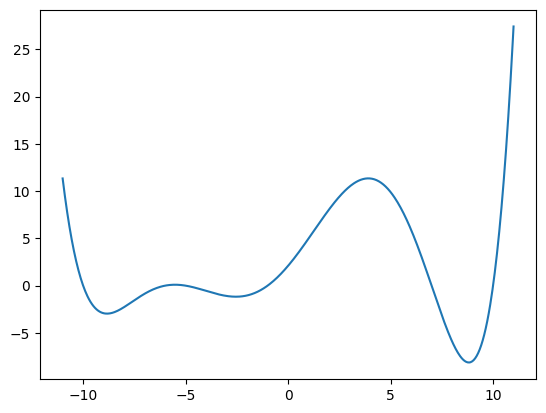

In [2]:
def function(x):
    return (x+10)*(x+6)*(x+5)*(x+1)*(x-7)*(x-10)/10000
xx = np.linspace(-11,11,600)
x = xx
plt.plot(xx, function(x))
fv = function(x)

## SA

In [ ]:
def SA(search_space, F, T, opc):
    scale = np.sqrt(T) ## Suggested by Robert & Casella (Intro to MC)
    start = np.random.choice(search_space)
    x = start 
    best = x
    history = [x]
    for i in range(1000):
        # Cálculo da vizinhança
        candidate = x + np.random.normal()*scale #.uniform(-1, 1, size=1) * scale

        if candidate <= 11 and candidate >= -11:
            # Diferença de Energia
            deltaE = F(candidate) - F(x)

            # Aceitação probabilística
            b = np.random.rand()
            if (b - np.exp(-deltaE/(i*T))) >= 0: # Caso TRUE, o candidato é descartado
                candidate = x  

            x = candidate

            if F(x) < F(best):
                    best = x

            T = resfriamento(T,i,deltaE, 0.9, 0, opc)
            history.append(x)
        
    return x, history, best
    
def resfriamento(T, k, deltaE, a = 0.75, b = 0, opc = 0):
    if opc == 1: # Linear
        T = T - a
    elif opc == 2: # Geométrica
        T = a*T
    elif opc == 3: # Logarítimica
        T = (np.log(k)/np.log(k+1)) * T
    elif opc == 4: # Híbrida
        if k <= b:
            T = (k/(k+1))*T
        else:
            T = a*T
    elif opc == 5: # Exponencial
        T = T/(1+b*T)
    else: # Adaptativa, ASL
        if deltaE > 0:
            T = (2 - a)*T
        else:
            T = a*T
    return T

## Testes

110.00000000000001
99.00000000000001
108.90000000000002
119.79000000000003
131.76900000000006
118.59210000000006
130.45131000000006
117.40617900000007
129.14679690000008
142.0614765900001
127.85532893100009
140.6408618241001
126.5767756416901
113.9190980775211
125.31100788527321
137.84210867380054
124.05789780642048
136.46368758706254
150.1100563457688
135.09905071119192
148.6089557823111
133.74806020408002
147.12286622448804
132.41057960203923
119.16952164183532
131.08647380601886
144.19512118662075
129.77560906795867
142.75316997475454
157.02848697223
141.325638275007
155.45820210250773
171.0040223127585
188.10442454403437
206.91486699843782
227.60635369828162
204.84571832845347
225.33029016129885
202.79726114516896
182.51753503065206
200.7692885337173
180.69235968034556
198.76159564838014
178.88543608354212
196.77397969189636
216.451377661086
194.8062398949774
214.28686388447517
192.85817749602765
212.14399524563044
190.9295957210674
210.02255529317415
189.02029976385674
170.1182697

C:\Users\guiar\AppData\Local\Temp\ipykernel_10452\2194763271.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  if (b - np.exp(-deltaE/(i*T))) >= 0: # Caso TRUE, o candidato é descartado


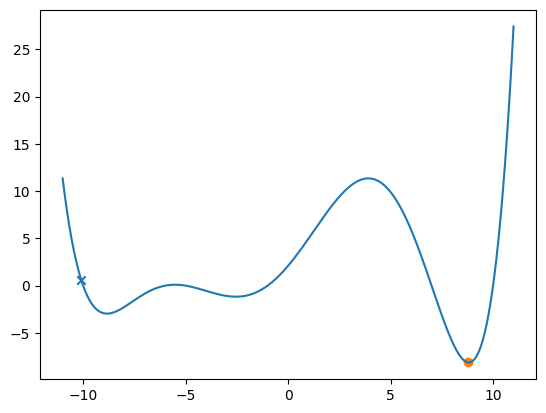

In [41]:
X = np.linspace(-11, 11, num=1000)
x1, history, best = SA(X, function, T = 100, opc = 0)

plt.plot(X, function(X))
plt.scatter(x1, function(x1), marker='x')
plt.scatter(best, function(best), marker='o')
#plt.plot(history, [function(y) for y in history])